### Important Libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("C:/Users/chhay/Desktop/Projects/census/train.csv")

In [3]:
test=pd.read_csv("C:/Users/chhay/Desktop/Projects/census/test.csv")

In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


C:\Users\chhay\AppData\Local\Temp\ipykernel_11228\2178954303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

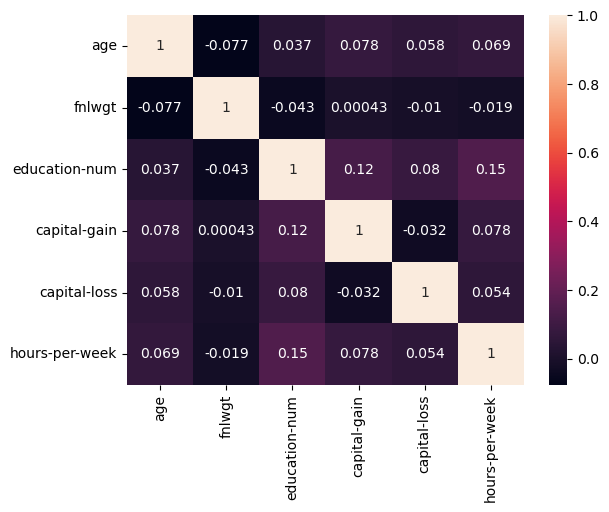

In [6]:
sns.heatmap(train.corr(),annot=True)

In [7]:
train.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [8]:
train_num=train[['age','education-num','capital-gain','capital-loss','hours-per-week']]
train_cat=train[['workclass','education','marital-status','occupation','relationship','native-country','race','sex','income']]

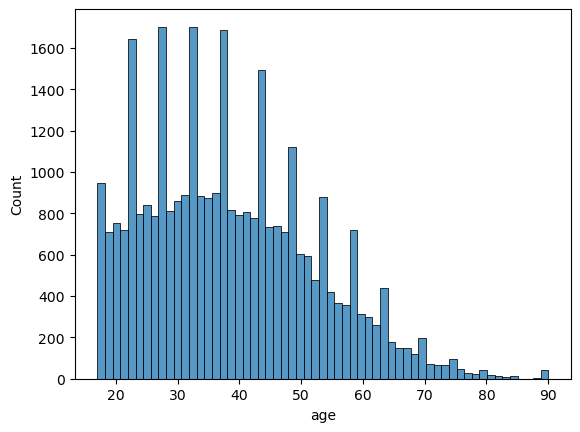

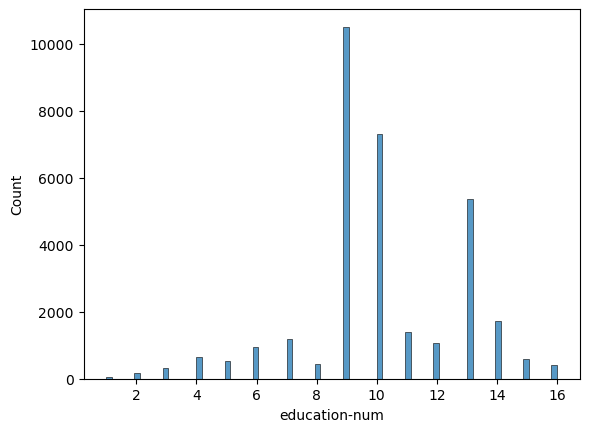

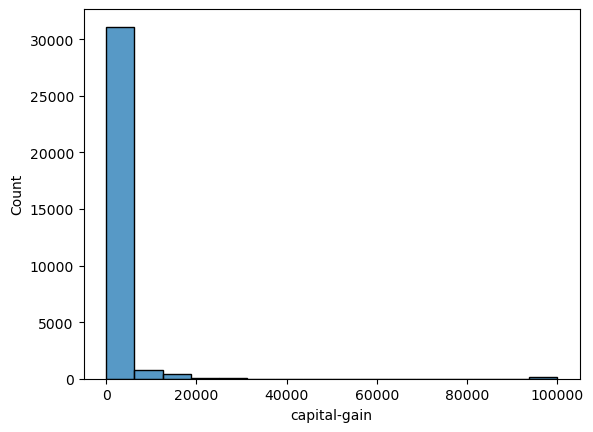

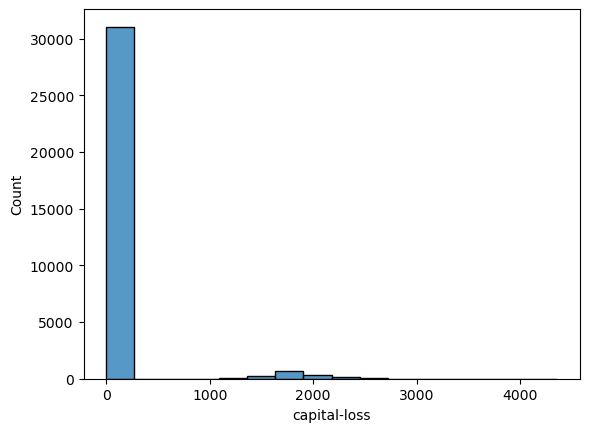

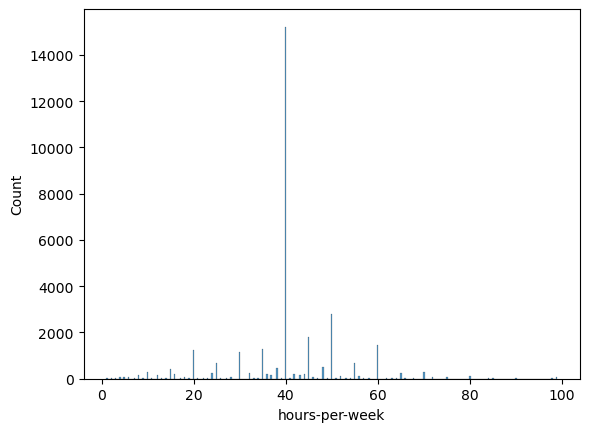

In [9]:
for i in train_num.columns:
    sns.histplot(train_num[i])
    plt.show()

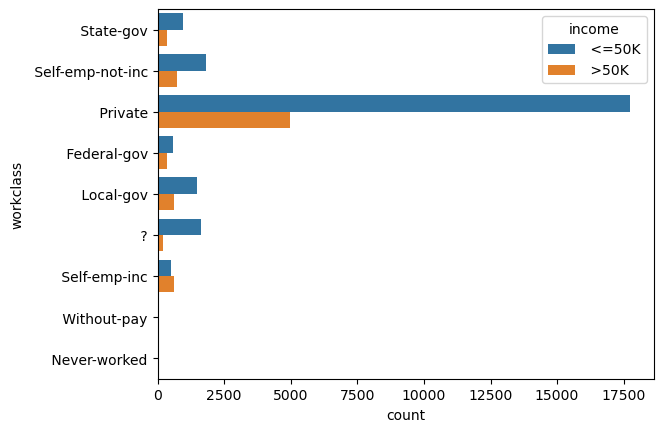

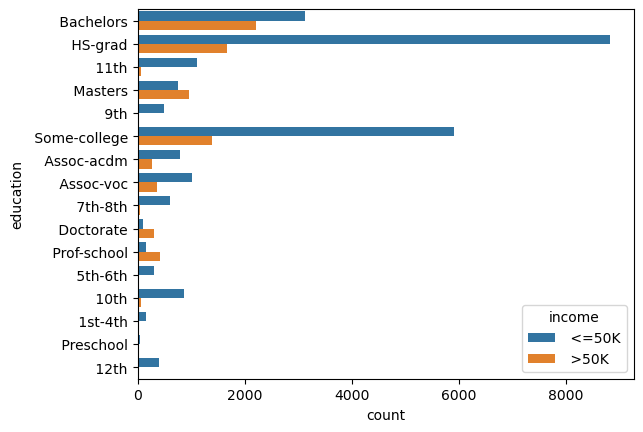

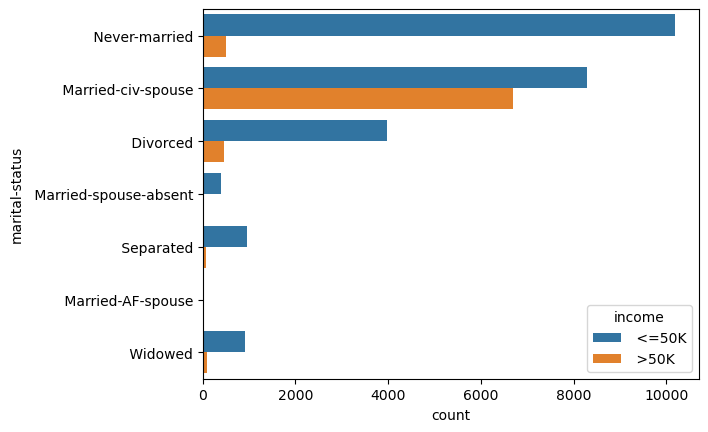

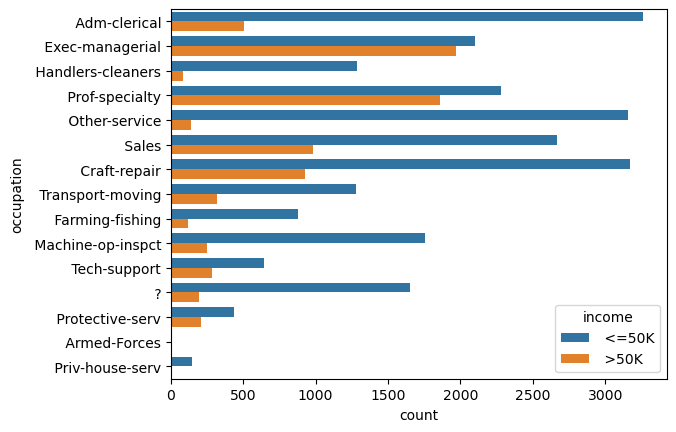

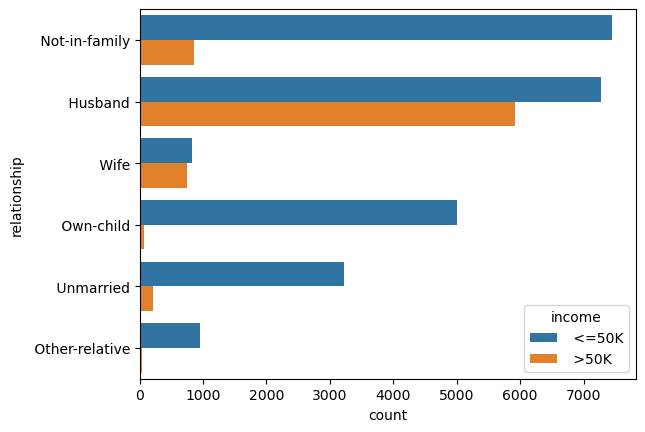

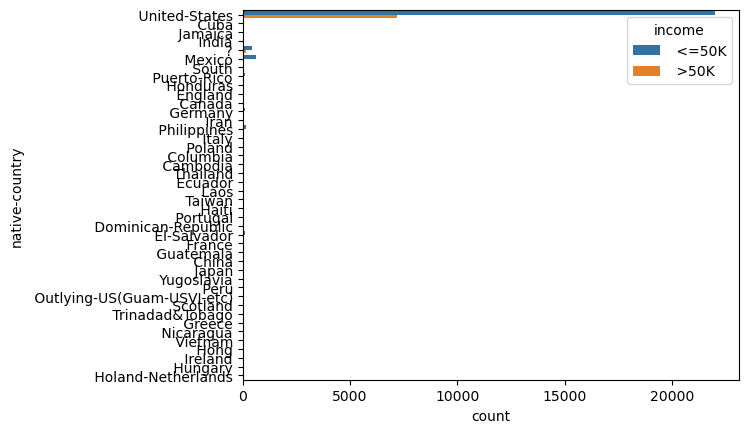

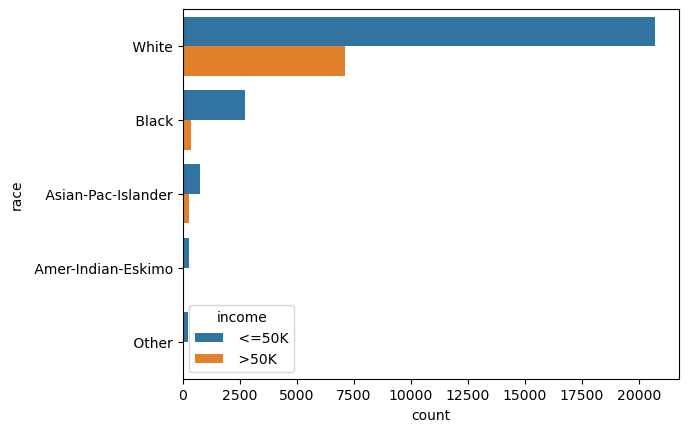

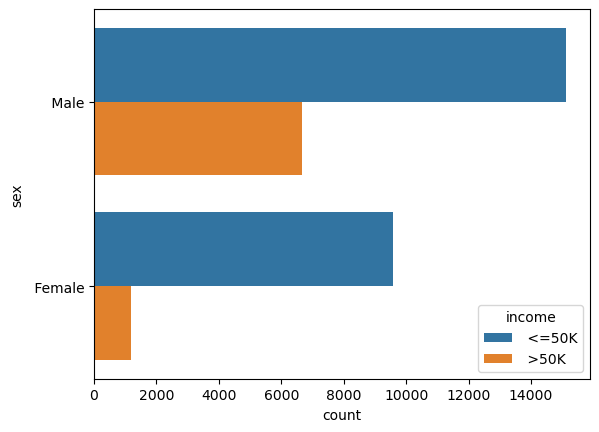

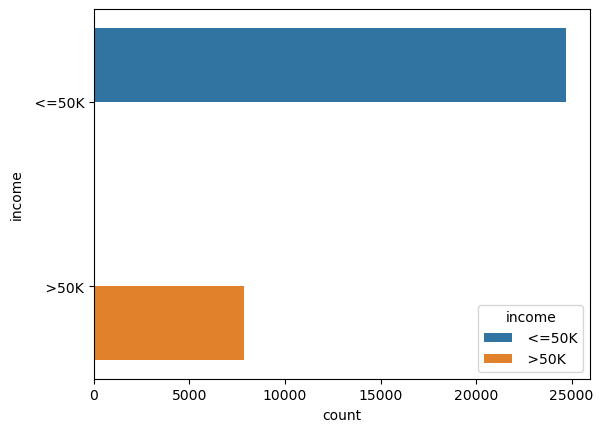

In [10]:
for i in train_cat.columns:
    sns.countplot(data=train,y=train_cat[i],hue='income')
    plt.show()

In [11]:
train= train.replace({'\?': np.nan}, regex=True)

### Removing or filling null values

<Axes: >

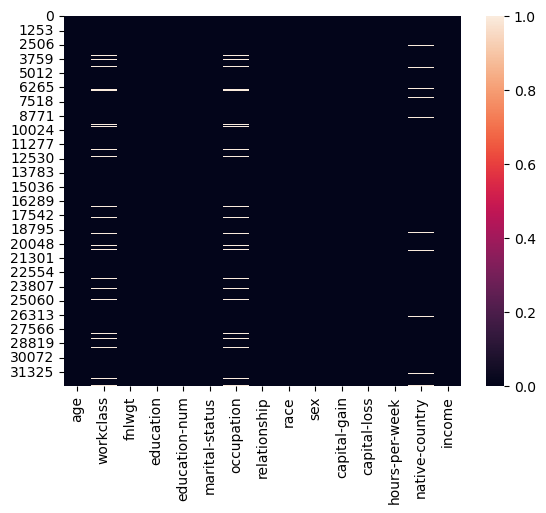

In [12]:
sns.heatmap(train.isnull())

In [13]:
train['workclass']=train['workclass'].fillna(train['workclass'].mode()[0])
train['occupation']=train['occupation'].fillna(train['occupation'].mode()[0])
train['native-country']=train['native-country'].fillna(train['native-country'].mode()[0])

<Axes: >

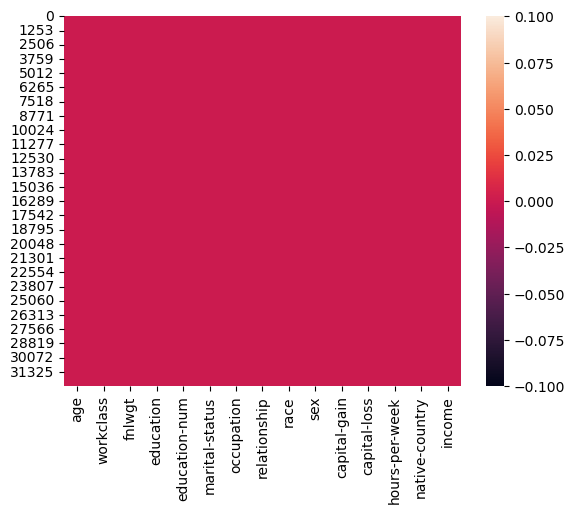

In [14]:
sns.heatmap(train.isnull())

### Feature Selection and Feature Engineering

We can see there are many categorical variables present in data. Hence, applying One hot encoding.
Some of the categorical variables have many classes, including those variables will increase the dimension of the data. Hence, we remove those columns. 

In [15]:
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [16]:
train['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
train['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [18]:
pd.get_dummies(train).shape

(32561, 107)

In [19]:
pd.get_dummies(train['relationship'])

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
32556,0,0,0,0,0,1
32557,1,0,0,0,0,0
32558,0,0,0,0,1,0
32559,0,0,0,1,0,0


In [20]:
train = pd.concat([train.drop('relationship', axis=1), pd.get_dummies(train['relationship'])], axis=1)

In [21]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K,0,0,0,0,0,1


In [22]:
train = pd.concat([train.drop('race', axis=1), pd.get_dummies(train['race'])], axis=1)
train = pd.concat([train.drop('sex', axis=1), pd.get_dummies(train['sex'])], axis=1)
train = pd.concat([train.drop('workclass', axis=1), pd.get_dummies(train['workclass'])], axis=1)
train = pd.concat([train.drop('marital-status', axis=1), pd.get_dummies(train['marital-status'])], axis=1)

In [23]:
train=train.drop('fnlwgt',axis=1)
train=train.drop('education',axis=1)
train=train.drop('occupation',axis=1)
train=train.drop('native-country',axis=1)

### Splitting the data and making model

In [24]:
X=train.drop('income',axis=1)
Y=train['income']

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(train_x)
X_test = sc.transform(test_x)

In [33]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(X_train, train_y)
y_pred = log.predict(test_x)
print("Accuracy:",accuracy_score(test_y, y_pred))

Accuracy: 0.23614309841854753


C:\Users\chhay\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, train_y)
y_pred1 = dt.predict(test_x)
print("Accuracy:",accuracy_score(test_y, y_pred1))

Accuracy: 0.7726086288960541


C:\Users\chhay\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, train_y)
y_pred2 = dt.predict(test_x)
print("Accuracy:",accuracy_score(test_y, y_pred2))

Accuracy: 0.7726086288960541


C:\Users\chhay\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, train_y)
y_pred3 = knn.predict(test_x)
print("Accuracy:",accuracy_score(test_y, y_pred3))

C:\Users\chhay\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.7753723322585598


In [32]:
from sklearn.svm import SVC 

sv = SVC() 
sv.fit(X_train, train_y)
y_pred4 = sv.predict(test_x)
print("Accuracy:",accuracy_score(test_y, y_pred4))

C:\Users\chhay\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy: 0.7638569015814525
